Practice Problem - 01:

In [1]:
import numpy as np # Linear algebra library
import matplotlib.pyplot as plt # library for visualization
from sklearn.decomposition import PCA # PCA library
import pandas as pd # Data frame library
import math # Library for math functions
import random # Library for pseudo random numbers

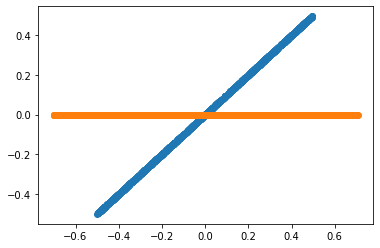

In [2]:
n = 1 # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x
# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean
data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables
# Create the transformation model for this data. Internally, it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
# Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])
# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [3]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.71604214e-01 1.06785490e-33]


angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


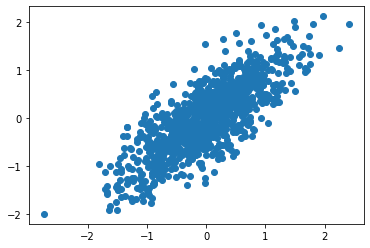

In [4]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
random.seed(100)
std1 = 1 # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable
x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000) # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)
# PCA works better if the data is centered
x = x - np.mean(x) # Center x
y = y - np.mean(y) # Center y
#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance.
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ', angle * 180 / math.pi)
# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])
print('rotationMatrix')
print(rotationMatrix)
xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y
# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array
# Print the rotated data
plt.scatter(data[:,0], data[:,1])

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.69714533 -0.71692983]
 [-0.71692983  0.69714533]]

Eigenvalues or explained variance
[0.90896295 0.10371478]


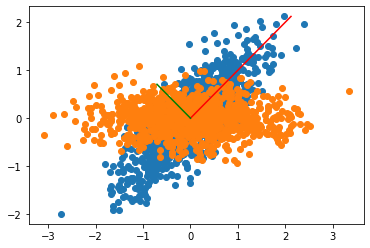

In [5]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue
# Apply PCA. In theory, the Eigenvector matrix must be the
# inverse of the original rotationMatrix.
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables
# Create the transformation model for this data. Internally it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)
# Create an array with the transformed data
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])
# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

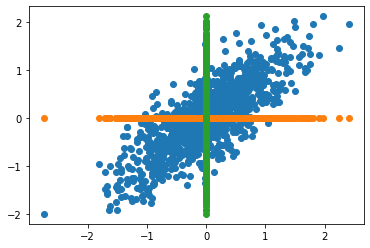

In [6]:
nPoints = len(data)
# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])
#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))
#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()

Practice Problem - 02

In [7]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

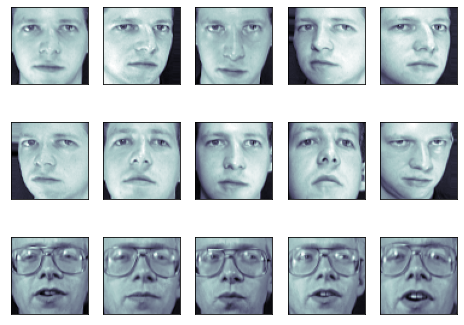

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)
print("X_train.shape, X_test.shape : ", X_train.shape, X_test.shape)

X_train.shape, X_test.shape :  (300, 4096) (100, 4096)


In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

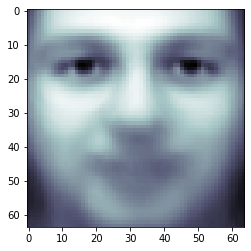

In [11]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

(150, 4096)
X_train_pca :  (300, 150)
X_test_pca :  (100, 150)


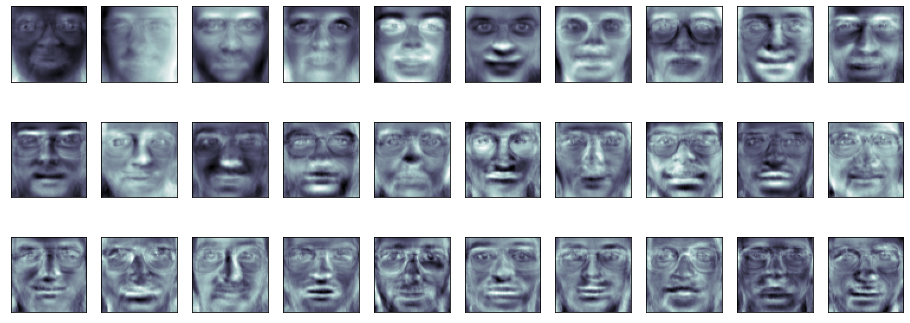

In [12]:
print(pca.components_.shape)
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca : ", X_train_pca.shape)
print("X_test_pca : ", X_test_pca.shape)

In [13]:
# Doing the Learning: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

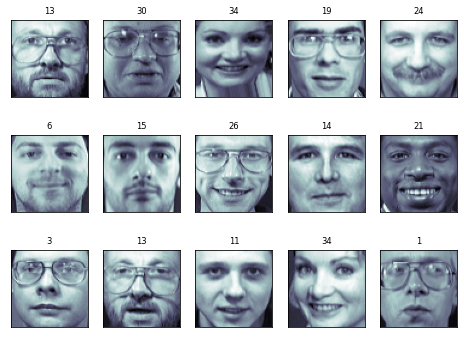

In [14]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [15]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.09      1.00      0.17         1
           4       1.00      1.00      1.00         1
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [16]:
# Pipelining
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


Problem 01 : 

1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations. 

2. Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations. 

3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system. 

No - 01

In [17]:
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
import pandas as pd 
import math 
import random
from sklearn import datasets

In [18]:
# Load Data
iris = datasets.load_iris()
print(iris)
print("shape : ", iris.data.shape)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [19]:
# Splitting data for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("X_train : ", X_train)
print("X_test : ", X_test)
print("y_train : ", y_train)
print("y_test : ", y_test)
print("X_train.shape : ", X_train.shape, "X_test.shape : ", X_test.shape)

X_train :  [[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 

In [20]:
# Train GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print("metrics.classification_report for y : ", metrics.classification_report(y_test, y_pred))

metrics.classification_report for y :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



No - 02

In [22]:
# No - 02
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
import pandas as pd 
import math 
import random
from sklearn import datasets

In [23]:
# load Dataset
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("X_train.shape : ", X_train.shape, "X_test.shape : ", X_test.shape)

X_train.shape :  (112, 4) X_test.shape :  (38, 4)


In [25]:
X_train_p = X_train - np.mean(X_train)
print("X_train_p : ", X_train_p)
X_test_p = X_test - np.mean(X_test)
print("X_test_p : ", X_test_p)

X_train_p :  [[ 2.41049107 -0.48950893  0.71049107 -1.98950893]
 [ 2.31049107 -0.88950893  0.51049107 -2.28950893]
 [ 3.31049107 -0.48950893  2.01049107 -1.38950893]
 [ 1.21049107 -0.28950893 -2.18950893 -3.28950893]
 [ 3.41049107 -0.38950893  1.61049107 -1.18950893]
 [ 1.51049107  0.01049107 -1.88950893 -2.88950893]
 [ 1.91049107  0.21049107 -1.98950893 -3.28950893]
 [ 1.51049107 -1.48950893  0.01049107 -2.48950893]
 [ 3.01049107 -0.48950893  2.01049107 -1.68950893]
 [ 3.21049107 -0.18950893  2.21049107 -0.98950893]
 [ 2.51049107 -1.28950893  1.51049107 -1.98950893]
 [ 3.21049107 -0.98950893  2.31049107 -1.68950893]
 [ 2.11049107 -0.98950893  0.41049107 -2.38950893]
 [ 4.21049107 -0.48950893  2.61049107 -1.18950893]
 [ 2.81049107 -0.18950893  1.21049107 -1.88950893]
 [ 2.01049107 -1.08950893  0.31049107 -2.38950893]
 [ 2.81049107 -0.78950893  1.41049107 -1.68950893]
 [ 2.81049107 -0.68950893  1.61049107 -1.98950893]
 [ 1.41049107 -0.98950893  1.01049107 -1.78950893]
 [ 2.81049107 -0.9

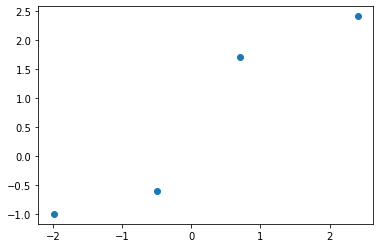

In [26]:
data = pd.DataFrame({'x': X_train_p[0], 'y': X_test_p[0]}) 
plt.scatter(data.x, data.y)

In [27]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4, whiten=True)
pcaTr= pca.fit(X_train)
print("pca.components_.shape : ", pca.components_.shape)

pca.components_.shape :  (4, 4)


In [28]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape : ", X_train_pca.shape)
print("X_test_pca.shape : ", X_test_pca.shape)
rotatedData = pcaTr.transform(X_train)

X_train_pca.shape :  (112, 4)
X_test_pca.shape :  (38, 4)


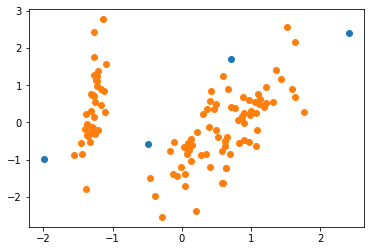

In [29]:
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2','PC3','PC4'])
plt.scatter(data.x, data.y)
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [30]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
std1 = 1
std2 = 0.333
n=1
angle = np.arctan(1 / n) 
print('angle : ', angle * 180 / math.pi)
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])
print('rotationMatrix', rotationMatrix)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.37649644 -0.06637905  0.85134571  0.35924188]
 [ 0.6240207   0.75538031 -0.18479376 -0.07648543]
 [-0.60667794  0.57674603  0.08522779  0.54040922]
 [ 0.31747515 -0.30390531 -0.48352659  0.75700273]]

Eigenvalues or explained variance
[4.45407391 0.25193059 0.07478621 0.0218018 ]
angle :  45.0
rotationMatrix [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


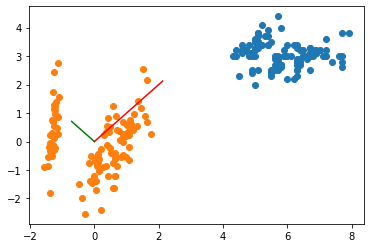

In [31]:
xy = np.concatenate(([X_train_p[0]] , [X_test_p[0]]), axis=0).T
data = np.dot(xy, rotationMatrix) 
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

No - 03

In [32]:
# No - 03
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [33]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

